In [2]:
import pandas as pd
import numpy as np

import ruptures as rpt
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import lightgbm as lgb
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [9]:
# データ読み込み
df = pd.read_csv('/Users/estyle-150/github/my_signage/data/processed/processed20240826.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head(5)

,y,client,close,price_am,price_pm,is_train,price,year,month,weekday,...,price_am_lag_7,price_am_lag_365,price_pm_lag_1,price_pm_lag_7,price_pm_lag_365,price_am_moving_avg_7,price_am_moving_avg_30,price_pm_moving_avg_7,price_pm_moving_avg_30,day
datetime,,,,,,,,,,,,,,,,,,,,,
2010-07-01,17,0,0,0.192308,0.076923,1,0.134615,2010,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2010-07-02,18,0,0,0.692308,0.423077,1,0.557692,2010,7,4,...,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,2
2010-07-03,20,0,0,1.807692,1.192308,1,1.500000,2010,7,5,...,NaN,NaN,0.423077,NaN,NaN,NaN,NaN,NaN,NaN,3
2010-07-04,20,0,0,1.407407,0.925926,1,1.166667,2010,7,6,...,NaN,NaN,1.192308,NaN,NaN,NaN,NaN,NaN,NaN,4
2010-07-05,14,0,0,0.346154,0.192308,1,0.269231,2010,7,0,...,NaN,NaN,0.925926,NaN,NaN,NaN,NaN,NaN,NaN,5


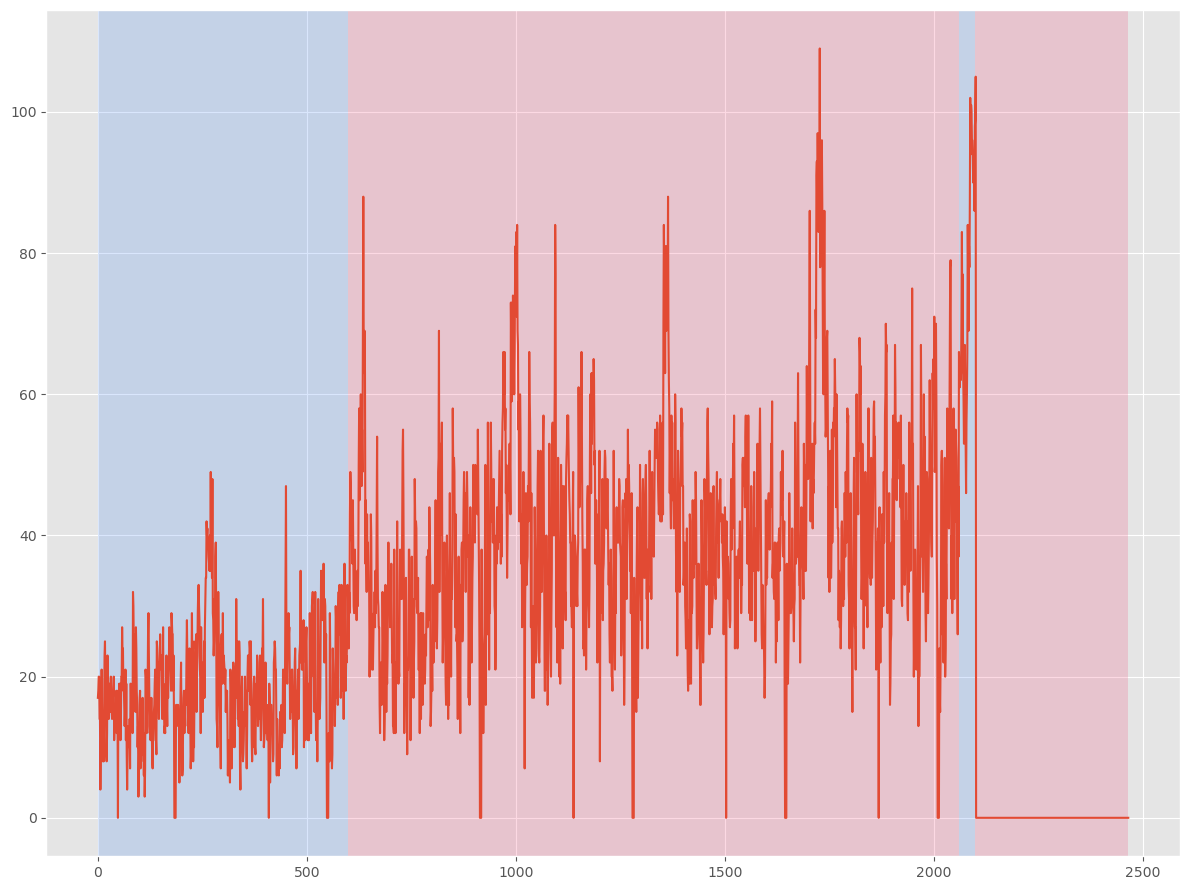

[600, 2060, 2100, 2466]


In [11]:
### 変化点検知 ###

# コスト関数の設定
model = "l2"
# アルゴの設定と学習
algo = rpt.Dynp(model=model).fit(df[['y']])
# 変化点の検出
my_bkps = algo.predict(n_bkps=3)
# 結果のプロット
rpt.show.display(df[['y']], my_bkps, figsize=(12, 9))
plt.show()
# 検出された変化点
print(my_bkps)

In [10]:
# 使用する特徴量を指定
use_list = ['y', 'is_train', 'client', 'close', 'price_am', 'price_pm', 'price', 'year', 'month', 'weekday']

df_use = df[use_list]
df_use

,y,is_train,client,close,price_am,price_pm,price,year,month,weekday
datetime,,,,,,,,,,
2010-07-01,17,1,0,0,0.192308,0.076923,0.134615,2010,7,3
2010-07-02,18,1,0,0,0.692308,0.423077,0.557692,2010,7,4
2010-07-03,20,1,0,0,1.807692,1.192308,1.500000,2010,7,5
2010-07-04,20,1,0,0,1.407407,0.925926,1.166667,2010,7,6
2010-07-05,14,1,0,0,0.346154,0.192308,0.269231,2010,7,0
...,...,...,...,...,...,...,...,...,...,...
2017-03-27,0,0,0,0,5.000000,4.000000,4.500000,2017,3,0
2017-03-28,0,0,0,0,4.000000,4.000000,4.000000,2017,3,1
2017-03-29,0,0,0,0,3.000000,3.000000,3.000000,2017,3,2


In [13]:
data = df_use[df_use['is_train']==1]

In [14]:
#訓練データサイズの指定なし
from sklearn.model_selection import TimeSeriesSplit
 
#TimeSeriesSplitの設定
#訓練データサイズの指定なし
tss_a = TimeSeriesSplit(n_splits = 3, max_train_size = None)
 
#交差検証
for train, test in tss_a.split(data):
  print(f"訓練用データは：{np.sort(data[train])}, 検証用データは：{np.sort(data[test])}")

KeyError: "None of [Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n       ...\n       516, 517, 518, 519, 520, 521, 522, 523, 524, 525],\n      dtype='int64', length=526)] are in the [columns]"